# Assignment Digital Signal & Image Processing
Giulia Benvenuto s4678610

## Wavelets
Compute the Haar wavelet transform of two 32-pixel image, $\mathcal{I}_{32}$ and $\mathcal{J}_{32}$ using the appropriate analysis filters. Sample the 32 values forming $\mathcal{I}_{32}$ uniformly from the set $\{0,1,...,255\}$.

Sample the first 16 values forming $\mathcal{J}_{32}$ uniformly from the set $\{24,25,26,27\}$ and the second
16 values from the set $\{201,202,203,204\}$. 

In both cases compute the fraction of the details coefficients larger than 1/100 and comment on the obtained results.

In [7]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

## Compute $I_{32}$ and $J_{32}$ and visualize them

Values in I32: [180 232 187  13  67  55  45 215 160   1 111 121 187 245 124  97 110  39
 205  45 160 195 226  82 246  73   8   5  96 119 188  64]


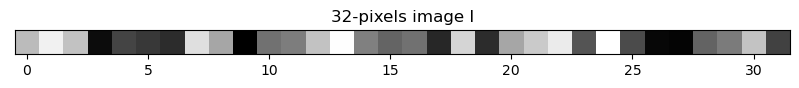

In [8]:
# Computing I32:
I32 = np.random.randint(0, 256, 32)
print("Values in I32:" ,I32)

# Visualize I32:
plt.imshow([I32], cmap='gray')
plt.title('32-pixels image I')
plt.yticks([])
plt.show()

Values in J32: [ 27  25  26  24  25  26  27  24  25  27  26  26  25  27  26  24 204 201
 201 203 204 203 202 203 202 204 201 203 201 204 203 201]


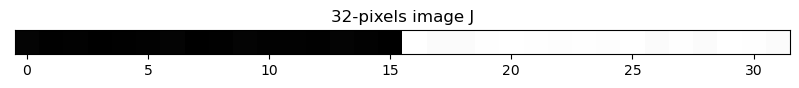

In [9]:
# Computing J32:
J32 = np.concatenate((np.random.randint(24, 28, size = (16,)), np.random.randint(201, 205, size = (16,))))
print("Values in J32:" ,J32)

# Visualize J32:
plt.imshow([J32], cmap='gray')
plt.title('32-pixels image J')
plt.yticks([])
plt.show()

## Another type of visualization for $I_{32}$ and $J_{32}$
In this case the two images are visualized as a signal. 

In [10]:
x = np.arange(1, 33, 1)

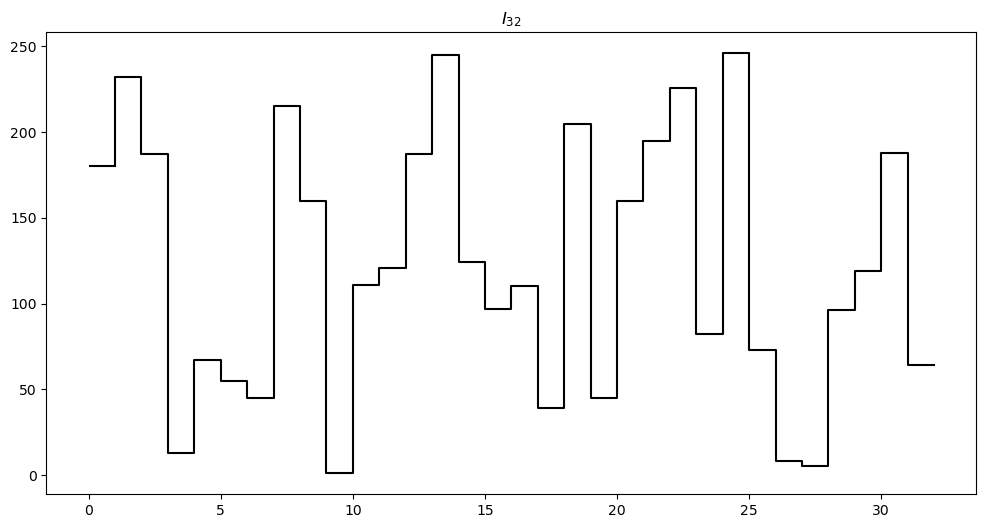

In [11]:
# Another visualization for I32:
plt.rcParams["figure.figsize"] = (12, 6)
plt.hlines(I32[0], 0, 1, color='k')
plt.step(x, I32, color='k')
plt.title("$I_{32}$")
plt.show()

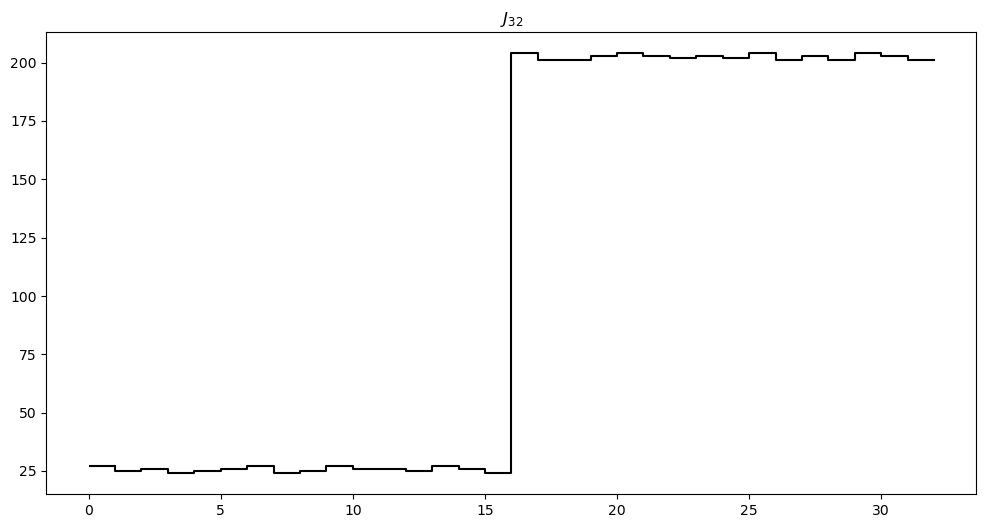

In [12]:
# Another visualization for J32:
plt.rcParams["figure.figsize"] = (12, 6)
plt.hlines(J32[0], 0, 1, color='k')
plt.step(x, J32, color='k')
plt.title("$J_{32}$")
plt.show()

## Single level decomposition
At first I tried to use the ${\tt pywt.dwt}$ function to operate a single level decomposition on our image $I_{32}$, in order to see how the library works. Each time a level is decomposed the function returns two arrays. The first array is the approximate coefficients of the signal. These coefficients correspond to the low-frequency components of the signal and represent a smoothed version of the original signal. The second array returned is the detail coefficients, which correspond to the high-frequency components of the signal and represent the fine details and variations present in the original signal. Together, the approximate and detail coefficients can be used to reconstruct the original signal using the inverse operation ${\tt pywt.idwt}$.

If the original images are composed of 32 pixels then the single level decomposition will return the 16 pixels version of that image. In fact the approximate coefficients array contains 16 values.  

In [13]:
wavelet = pywt.Wavelet('haar')

In [14]:
# Single level decomposition for I32:
I_cA, I_cD = pywt.dwt(I32, 'haar')
print("Lower resolution coefficients:" ,I_cA)
print("Detail coefficients:" ,I_cD)

Lower resolution coefficients: [291.32799385 141.42135624  86.2670273  183.84776311 113.84419177
 164.04877324 305.47012947 156.27059864 105.3589104  176.7766953
 251.02290732 217.78888861 225.5670632    9.19238816 152.02795796
 178.19090886]
Detail coefficients: [ -36.76955262  123.03657993    8.48528137 -120.2081528   112.42997821
   -7.07106781  -41.01219331   19.09188309   50.20458146  113.13708499
  -24.74873734  101.82337649  122.32947315    2.12132034  -16.26345597
   87.68124087]


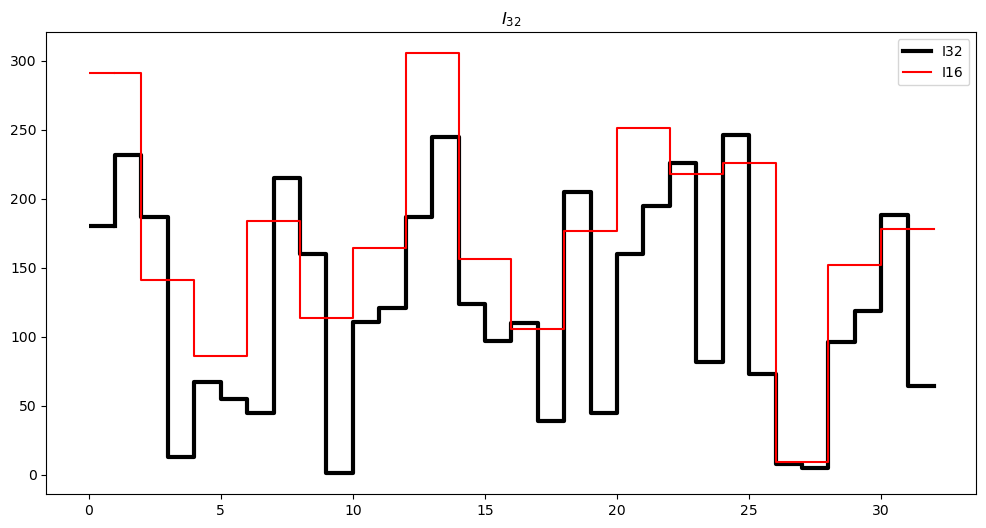

In [15]:
# To visualize I_cA on the previous plot with 32 pixels I need to repeat each value two times
I16 = np.repeat(I_cA, 2)

# Visualization of I16
plt.rcParams["figure.figsize"] = (12, 6)
plt.hlines(I32[0], 0, 1, color='k', linewidth=3)
plt.hlines(I16[0], 0, 1, color='r')
plt.step(x, I32, color='k', label="I32",  linewidth=3)
plt.step(x, I16, color='r', label="I16")
plt.title("$I_{32}$")
plt.legend()
plt.show()

In [16]:
# Single level decomposition for J32:
J_cA, J_cD = pywt.dwt(J32, 'haar')
print("Lower resolution coefficients:" ,J_cA)
print("Detail coefficients:" ,J_cD)

Lower resolution coefficients: [ 36.76955262  35.35533906  36.06244584  36.06244584  36.76955262
  36.76955262  36.76955262  35.35533906 286.37824638 285.6711396
 287.79245994 286.37824638 287.08535316 285.6711396  286.37824638
 285.6711396 ]
Detail coefficients: [ 1.41421356  1.41421356 -0.70710678  2.12132034 -1.41421356  0.
 -1.41421356  1.41421356  2.12132034 -1.41421356  0.70710678 -0.70710678
 -1.41421356 -1.41421356 -2.12132034  1.41421356]


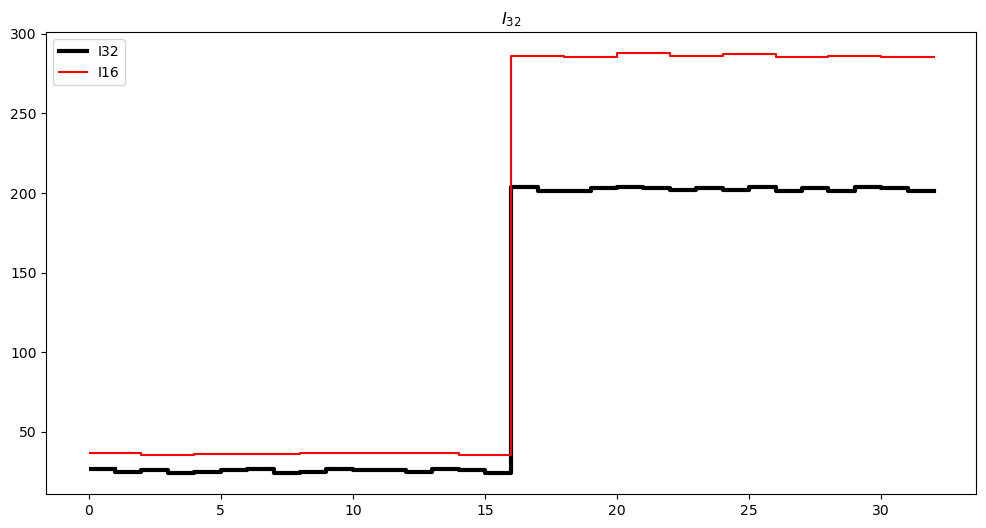

In [17]:
# To visualize I_cA on the previous plot with 32 pixels I need to repeat each value two times
J16 = np.repeat(J_cA, 2)

# Visualization of I16
plt.rcParams["figure.figsize"] = (12, 6)
plt.hlines(J32[0], 0, 1, color='k', linewidth=3)
plt.hlines(J16[0], 0, 1, color='r')
plt.step(x, J32, color='k', label="I32",  linewidth=3)
plt.step(x, J16, color='r', label="I16")
plt.title("$I_{32}$")
plt.legend()
plt.show()

## Reconstruction

Values of I32 reconstructed: [180. 232. 187.  13.  67.  55.  45. 215. 160.   1. 111. 121. 187. 245.
 124.  97. 110.  39. 205.  45. 160. 195. 226.  82. 246.  73.   8.   5.
  96. 119. 188.  64.]


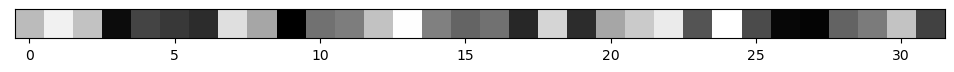

Values of J32 reconstructed: [ 27.  25.  26.  24.  25.  26.  27.  24.  25.  27.  26.  26.  25.  27.
  26.  24. 204. 201. 201. 203. 204. 203. 202. 203. 202. 204. 201. 203.
 201. 204. 203. 201.]


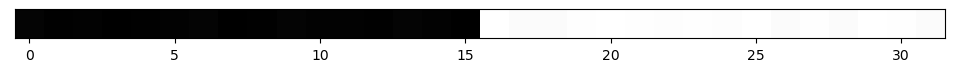

In [18]:
# Reconstruction for I32:
I32_reconstructed = pywt.idwt(I_cA, I_cD, 'haar')
print("Values of I32 reconstructed:" ,I32_reconstructed)

# Visualize I32 reconstructed:
plt.imshow([I32_reconstructed], cmap='gray')
plt.yticks([])
plt.show()


# Reconstruction for J32:
J32_reconstructed = pywt.idwt(J_cA, J_cD, 'haar')
print("Values of J32 reconstructed:" ,J32_reconstructed)

# Visualize J32 reconstructed:
plt.imshow([J32_reconstructed], cmap='gray')
plt.yticks([])
plt.show()

## Coefficient $\sqrt 2$
We expect the first coefficient to be the average of the first two elements of the image $I_{32}$, but if we check what's inside the coefficient vector computed by the ${\tt pywt}$ library it doesn't correspond. This is due to the fact that during the decomposition everything is multiplied by a $\sqrt2$ factor in order to make the Haar wavelets orthonormal.

In [19]:
average = (I32[0] + I32[1]) / 2
print("Average between the first and the second element in I32:", average)

print("Average multiplied by sqrt(2):", average * np.sqrt(2))

if(average * np.sqrt(2) == I_cA[0]):
    print("True")

Average between the first and the second element in I32: 206.0
Average multiplied by sqrt(2): 291.3279938488576
True


## Multilevel decomposition
The ${\tt pywt.wavedec}$ function can be used to perform a multilevel decomposition of our $I_{32}$ and $J_{32}$ images using the Haar Wavelets. The function takes three main arguments: the image, the wavelet function to be used, and the number of levels of decomposition to perform.

In multilevel decomposition, the image is first decomposed into an approximation and a set of detail coefficients at the highest level. Then, the approximation coefficients are further decomposed into another set of approximation and detail coefficients at the next level, and so on. This process is repeated for the specified number of levels, resulting in a tree-like structure of coefficients.

## $I_{32}$ decomposition

In [20]:
coeffs_I32 = pywt.wavedec(I32, 'haar', level = 5)
print(coeffs_I32)

[array([689.60588835]), array([31.64302846]), array([-13.  ,  65.75]), array([ 81.31727984, -91.92388155, -93.33809512, -47.72970773]), array([106. , -69. , -35.5, 105.5, -50.5,  23.5, 153. , -18.5]), array([ -36.76955262,  123.03657993,    8.48528137, -120.2081528 ,
        112.42997821,   -7.07106781,  -41.01219331,   19.09188309,
         50.20458146,  113.13708499,  -24.74873734,  101.82337649,
        122.32947315,    2.12132034,  -16.26345597,   87.68124087])]


In [21]:
cA5, cD5, cD4, cD3, cD2, cD1 = coeffs_I32
print(cA5)
print(cD5)
print(cD4)
print(cD3)
print(cD2)
print(cD1)

[689.60588835]
[31.64302846]
[-13.    65.75]
[ 81.31727984 -91.92388155 -93.33809512 -47.72970773]
[106.  -69.  -35.5 105.5 -50.5  23.5 153.  -18.5]
[ -36.76955262  123.03657993    8.48528137 -120.2081528   112.42997821
   -7.07106781  -41.01219331   19.09188309   50.20458146  113.13708499
  -24.74873734  101.82337649  122.32947315    2.12132034  -16.26345597
   87.68124087]


### Fraction of the details coefficients larger than 1/100 for $I_{32}$

In [22]:
details_I32 = np.concatenate((cD5, cD4, cD3, cD2, cD1))
print(details_I32)

[  31.64302846  -13.           65.75         81.31727984  -91.92388155
  -93.33809512  -47.72970773  106.          -69.          -35.5
  105.5         -50.5          23.5         153.          -18.5
  -36.76955262  123.03657993    8.48528137 -120.2081528   112.42997821
   -7.07106781  -41.01219331   19.09188309   50.20458146  113.13708499
  -24.74873734  101.82337649  122.32947315    2.12132034  -16.26345597
   87.68124087]


In [23]:
filtered_details_I32 = [i for i in np.abs(details_I32) if i > 1/100]
print(filtered_details_I32)

[31.643028458098, 13.0, 65.75, 81.317279836453, 91.92388155425118, 93.33809511662432, 47.729707730092, 106.00000000000001, 68.99999999999999, 35.5, 105.50000000000001, 50.500000000000014, 23.5, 153.0, 18.499999999999986, 36.769552621700484, 123.03657992645928, 8.485281374238575, 120.20815280171308, 112.42997820866105, 7.0710678118654755, 41.01219330881975, 19.091883092036795, 50.204581464244875, 113.13708498984761, 24.748737341529164, 101.82337649086284, 122.32947314527273, 2.121320343559643, 16.263455967290597, 87.68124086713192]


In [24]:
fraction = len(filtered_details_I32) / len(details_I32)
print(fraction)

1.0


### **Observations:** 
Since the values for $I_{32}$ are uniformly sampled in the interval ${0,...,255}$ they are really different one from each other, this means that during the decomposition, the detail coefficients will be big in order to be able to reconstruct the original image. This means that, in this case, we will expect the fraction of details coefficients larger than 1/100 to be really close to 1 or even 1 itself.

## $I_{32}$ reconstruction

Values of I32 reconstructed: [180. 232. 187.  13.  67.  55.  45. 215. 160.   1. 111. 121. 187. 245.
 124.  97. 110.  39. 205.  45. 160. 195. 226.  82. 246.  73.   8.   5.
  96. 119. 188.  64.]


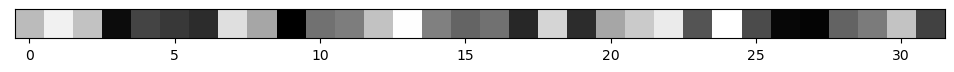

In [25]:
I32_reconstructed = pywt.waverec(coeffs_I32, 'haar')
print("Values of I32 reconstructed:" ,I32_reconstructed)

# Visualize I32 reconstructed:
plt.imshow([I32_reconstructed], cmap = 'gray')
plt.yticks([])
plt.show()

## $J_{32}$ decomposition

In [26]:
coeffs_J32 = pywt.wavedec(J32, 'haar', level = 5)
print(coeffs_J32)

[array([645.23493783]), array([-500.27804769]), array([-0.5,  0.5]), array([-1.42108547e-14,  7.07106781e-01, -1.06066017e+00,  3.53553391e-01]), array([ 1.00000000e+00,  0.00000000e+00, -7.10542736e-15,  1.00000000e+00,
        5.00000000e-01,  1.00000000e+00,  1.00000000e+00,  5.00000000e-01]), array([ 1.41421356,  1.41421356, -0.70710678,  2.12132034, -1.41421356,
        0.        , -1.41421356,  1.41421356,  2.12132034, -1.41421356,
        0.70710678, -0.70710678, -1.41421356, -1.41421356, -2.12132034,
        1.41421356])]


In [27]:
cA5, cD5, cD4, cD3, cD2, cD1 = coeffs_J32
print(cA5)
print(cD5)
print(cD4)
print(cD3)
print(cD2)
print(cD1)

[645.23493783]
[-500.27804769]
[-0.5  0.5]
[-1.42108547e-14  7.07106781e-01 -1.06066017e+00  3.53553391e-01]
[ 1.00000000e+00  0.00000000e+00 -7.10542736e-15  1.00000000e+00
  5.00000000e-01  1.00000000e+00  1.00000000e+00  5.00000000e-01]
[ 1.41421356  1.41421356 -0.70710678  2.12132034 -1.41421356  0.
 -1.41421356  1.41421356  2.12132034 -1.41421356  0.70710678 -0.70710678
 -1.41421356 -1.41421356 -2.12132034  1.41421356]


### Fraction of the details coefficients larger than 1/100 for $J_{32}$

In [28]:
details_J32 = np.concatenate((cD5, cD4, cD3, cD2, cD1))
print(details_J32)

[-5.00278048e+02 -5.00000000e-01  5.00000000e-01 -1.42108547e-14
  7.07106781e-01 -1.06066017e+00  3.53553391e-01  1.00000000e+00
  0.00000000e+00 -7.10542736e-15  1.00000000e+00  5.00000000e-01
  1.00000000e+00  1.00000000e+00  5.00000000e-01  1.41421356e+00
  1.41421356e+00 -7.07106781e-01  2.12132034e+00 -1.41421356e+00
  0.00000000e+00 -1.41421356e+00  1.41421356e+00  2.12132034e+00
 -1.41421356e+00  7.07106781e-01 -7.07106781e-01 -1.41421356e+00
 -1.41421356e+00 -2.12132034e+00  1.41421356e+00]


In [29]:
filtered_details_J32 = [i for i in np.abs(details_J32) if i > 1/100]
print(filtered_details_J32)

[500.27804768948255, 0.4999999999999929, 0.5, 0.7071067811865532, 1.0606601717798867, 0.35355339059333346, 0.9999999999999964, 0.9999999999999964, 0.5, 1.0000000000000284, 1.0000000000000284, 0.5, 1.4142135623730958, 1.4142135623730958, 0.7071067811865497, 2.121320343559642, 1.4142135623730958, 1.4142135623730958, 1.4142135623730958, 2.1213203435596313, 1.4142135623731065, 0.7071067811865248, 0.7071067811865532, 1.414213562373078, 1.4142135623731065, 2.1213203435596313, 1.4142135623731065]


In [30]:
fraction = len(filtered_details_J32) / len(details_J32)
print(fraction)

0.8709677419354839


### **Observations:** 
The first 16 values of $J_{32}$ are uniformly sampled in the interval ${24,25,26,27}$ and the following 16 values are uniformly sampled in the interval ${201,202,203,204}$. This means that the first 16 values will be really similar to each other and the same goes for the next 16 values, consequently we expect to have detail coefficients smaller respect to the $I_{32}$ case. In fact when we compute the fraction of details coefficients larger than 1/100, here, we will find a value smaller than 1. This means that not all the details are fundamental for the reconstruction and so, insted of store all the details, some of them may not be considered, this reduces the space needed in memory to represent the image and so we can take advantage from it.

## $J_{32}$ reconstruction

Values of J32 reconstructed: [ 27.  25.  26.  24.  25.  26.  27.  24.  25.  27.  26.  26.  25.  27.
  26.  24. 204. 201. 201. 203. 204. 203. 202. 203. 202. 204. 201. 203.
 201. 204. 203. 201.]


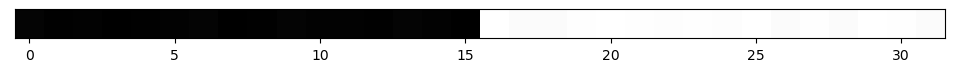

In [32]:
J32_reconstructed = pywt.waverec(coeffs_J32, 'haar')
print("Values of J32 reconstructed:" ,J32_reconstructed)

# Visualize I32 reconstructed:
plt.imshow([J32_reconstructed], cmap = 'gray')
plt.yticks([])
plt.show()

## Haar Wavelet Transform 
In theory the library that I used implements an *analysis filter* to make a multiresolution analysis. The analysis filter computes at all the scales the average between pairs of adjacent values and the detail coefficients which allow you to reconstruct the original image. All this process can be described in terms of matrices. 

We want to find the $2^{j-1} x 2^j$ matrices $A^j$ and $B^j$ needed to obtain the lower resolution coefficients:
<center>
    $C^{j-1} = A^jC^j$ (coefficients vector)
    <br>
    $D^{j-1} = B^jC^j$ (detail vector)
<\center>

where $A^j = \frac{1}{2}(P^j)^T$ and $B^j = \frac{1}{2}(Q^j)^T$
    
with $P^j = 
\begin{bmatrix}
    1 & 0 & 0 & 0 & ... & 0 \\
    1 & 0 & 0 & 0 & ... & 0\\
    0 & 1 & 0 & 0 & ... & 0\\
    0 & 1 & 0 & 0 & ... & 0\\
      &   &   &   & ... &  \\
    0 & 0 & 0 & 0 & ... & 1\\
    0 & 0 & 0 & 0 & ... & 1\\
\end{bmatrix}$
and $Q^j = 
\begin{bmatrix}
    1 & 0 & 0 & 0 & ... & 0 \\
    -1 & 0 & 0 & 0 & ... & 0\\
    0 & 1 & 0 & 0 & ... & 0\\
    0 & -1 & 0 & 0 & ... & 0\\
      &   &   &   & ... &  \\
    0 & 0 & 0 & 0 & ... & 1\\
    0 & 0 & 0 & 0 & ... & -1\\
\end{bmatrix}$
